In [38]:
#we first gonna import the necessary libraries.
import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import requests
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [39]:
#now we are gonna load the data given for the students
data=pd.read_csv(r'C:\Users\PC\Downloads\2012_SAT_Results (4).csv')
print(data)

        DBN                                    SCHOOL NAME  \
0    01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1    01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2    01M450                     EAST SIDE COMMUNITY SCHOOL   
3    01M458                      FORSYTH SATELLITE ACADEMY   
4    01M509                        MARTA VALLE HIGH SCHOOL   
..      ...                                            ...   
473  75X012               P.S. X012 LEWIS AND CLARK SCHOOL   
474  75X754        J. M. RAPPORT SCHOOL CAREER DEVELOPMENT   
475  79M645     SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION   
476  79Q950                            GED PLUS s CITYWIDE   
477  79X490                                PHOENIX ACADEMY   

    Num of SAT Test Takers SAT Critical Reading Avg. Score  \
0                       29                             355   
1                       91                             383   
2                       70                             377   
3      

In [40]:
# we are now gonna check for missing values
print(data.isnull().sum())


DBN                                0
SCHOOL NAME                        0
Num of SAT Test Takers             0
SAT Critical Reading Avg. Score    0
SAT Math Avg. Score                0
SAT Writing Avg. Score             0
dtype: int64


In [41]:
# and then drop rows with missing values if there any exist.
data = data.dropna()


In [42]:
#prepare the data for k-clustering by extracting the relevant columns
dataset = data[['Num of SAT Test Takers','SAT Critical Reading Avg. Score','SAT Math Avg. Score','SAT Writing Avg. Score''Num of SAT Test Takers','SAT Critical Reading Avg. Score','SAT Math Avg. Score','SAT Writing Avg. Score']]


In [ ]:
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(dataset)
#as it seems we cant scale the data cause there a lot of s prices in it


In [49]:
#Now the data are ready to be clustered.
kmeans = KMeans(
      init="random",
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42)

In [ ]:
# Now that the k-means class is ready, the next step is to fit it to the data in scaled_data. This will perform ten runs of the k-means algorithm on your data with a maximum of 300 iterations per run
#same problem as before
kmeans.fit(scaled_data)

In [ ]:
#two methods that are commonly used to evaluate the appropriate number of clusters:

#The elbow method
#The silhouette coefficient which i cannot use cause my data arent scaled so icant have the lowest sse value.

In [ ]:
# A list holds the silhouette coefficients for each k
 silhouette_coefficients = []
   
   # we start  at 2 clusters for silhouette coefficient
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_dataset)
        score = silhouette_score(scaled_dataset, kmeans.labels_)
        silhouette_coefficients.append(score)

In [ ]:
#the code below would produce a silhouette coeficient plot.
plt.style.use("dataset")
    plt.plot(range(2, 11), silhouette_coefficients)
    plt.xticks(range(2, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.show()

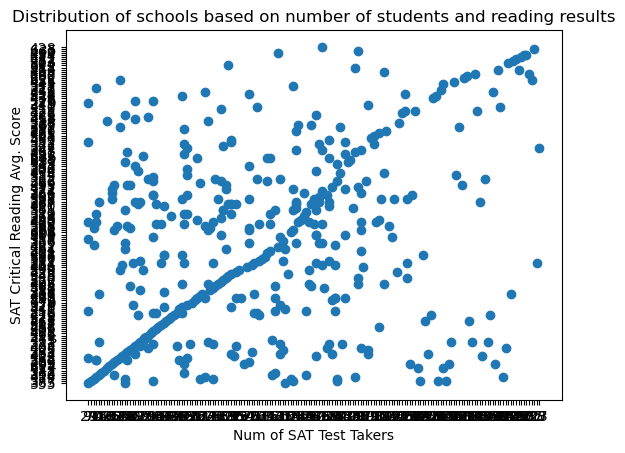

In [60]:
#in order to visualize the distribution of the data using scatter plot
plt.scatter(data['Num of SAT Test Takers'], data['SAT Critical Reading Avg. Score'])
plt.xlabel('Num of SAT Test Takers')
plt.ylabel('SAT Critical Reading Avg. Score')
plt.title('Distribution of schools based on number of students and reading results')
plt.show()


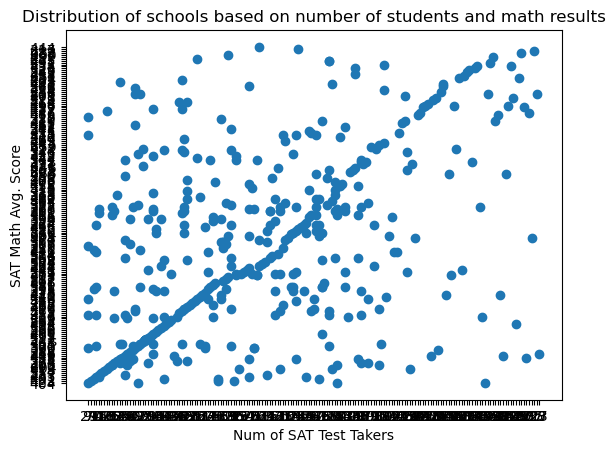

In [58]:
plt.scatter(data['Num of SAT Test Takers'], data['SAT Math Avg. Score'])
plt.xlabel('Num of SAT Test Takers')
plt.ylabel('SAT Math Avg. Score')
plt.title('Distribution of schools based on number of students and math results')
plt.show()


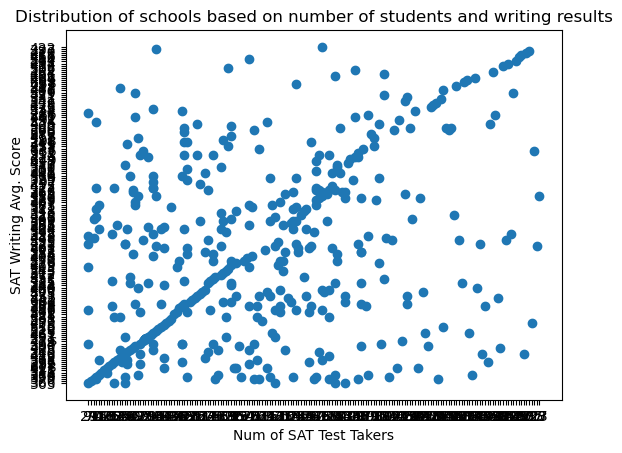

In [59]:
plt.scatter(data['Num of SAT Test Takers'], data['SAT Writing Avg. Score'])
plt.xlabel('Num of SAT Test Takers')
plt.ylabel('SAT Writing Avg. Score')
plt.title('Distribution of schools based on number of students and writing results')
plt.show()
